In [1]:
!pip install pandas

In [2]:
!wget https://www.econometrics.com/intro/SALES.txt

--2024-06-19 03:45:36--  https://www.econometrics.com/intro/SALES.txt
Resolving www.econometrics.com (www.econometrics.com)... 51.105.35.37
Connecting to www.econometrics.com (www.econometrics.com)|51.105.35.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577 [text/plain]
Saving to: ‘SALES.txt’

SALES.txt           100%[===================>]     577  --.-KB/s    in 0s      

2024-06-19 03:45:36 (171 MB/s) - ‘SALES.txt’ saved [577/577]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('SALES.txt', sep='\s+', header=None)
data.columns = ['Sales', 'Advertising']

In [5]:
print(data.head())
print(data.info())
print(data.describe())

   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes
None
           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


In [6]:
X = data['Sales'].values.reshape(-1, 1)
y = data['Advertising'].values.reshape(-1, 1)

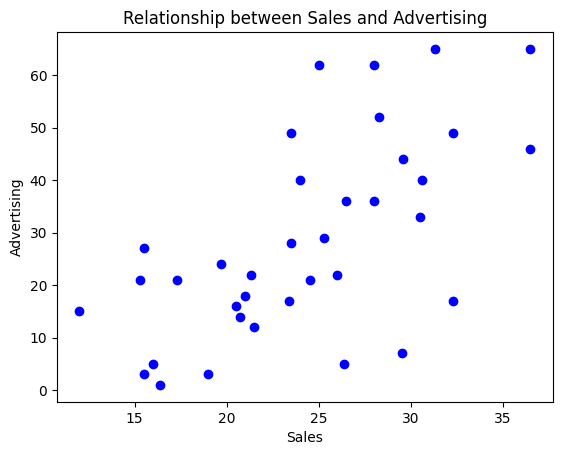

In [7]:
plt.scatter(X, y, color='blue')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lm.predict(X_test)

In [11]:
a = lm.coef_
b = lm.intercept_
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: [-11.16003616]


In [12]:
def predict_ad_cost(sales):
    return lm.predict(np.array([[sales]]))[0][0]

sales_values = [50, 100, 150]
predictions = [predict_ad_cost(sales) for sales in sales_values]

for sales, ad_cost in zip(sales_values, predictions):
    print(f'Predicted Advertising Cost for {sales} Sales: ${ad_cost:.2f}')

Predicted Advertising Cost for 50 Sales: $69.09
Predicted Advertising Cost for 100 Sales: $149.35
Predicted Advertising Cost for 150 Sales: $229.60


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

RMSE: 11.23
R2 Score: 0.58
